In [32]:
import random
import matplotlib.pyplot as plt

In [33]:
X = []
Y = []
for _ in range(1, 100):
    x1 = random.random()
    x2 = random.random()
    y = 100*x1 + 300*x2 + 67 + 5*random.random() - 5*random.random()
    X.append((x1, x2))
    Y.append(y)

In [34]:
X

[(0.31833558277817975, 0.5691269510894333),
 (0.9493637957307749, 0.35733525391070453),
 (0.40134330329217116, 0.13929993237446348),
 (0.5899000492835015, 0.6382341911594056),
 (0.48336227442256174, 0.8673264759943737),
 (0.6355446068229215, 0.7323525656019123),
 (0.7761146121588935, 0.14187507512595765),
 (0.34066969022727855, 0.6700913422860234),
 (0.004782915176726132, 0.6248893096215928),
 (0.5798074486187915, 0.3612330583660648),
 (0.23418735939961044, 0.7457768586546899),
 (0.5309651544804701, 0.7835282980529757),
 (0.8270638696009243, 0.5074273760259798),
 (0.7263428058010922, 0.4106949716645334),
 (0.5510738489275373, 0.9714876603169781),
 (0.21543566593217145, 0.26769151892308785),
 (0.0986441682485143, 0.23997096126515005),
 (0.6398893634317092, 0.1408268155373128),
 (0.50454819005972, 0.7336829304545619),
 (0.42286419533112196, 0.6085625838303932),
 (0.9424110103595827, 0.8199683583256906),
 (0.6439106263460905, 0.6009360131318872),
 (0.5188845320878241, 0.5634659075688008),

In [35]:
X[0]

(0.31833558277817975, 0.5691269510894333)

In [36]:
Y[0]

270.19886343399656

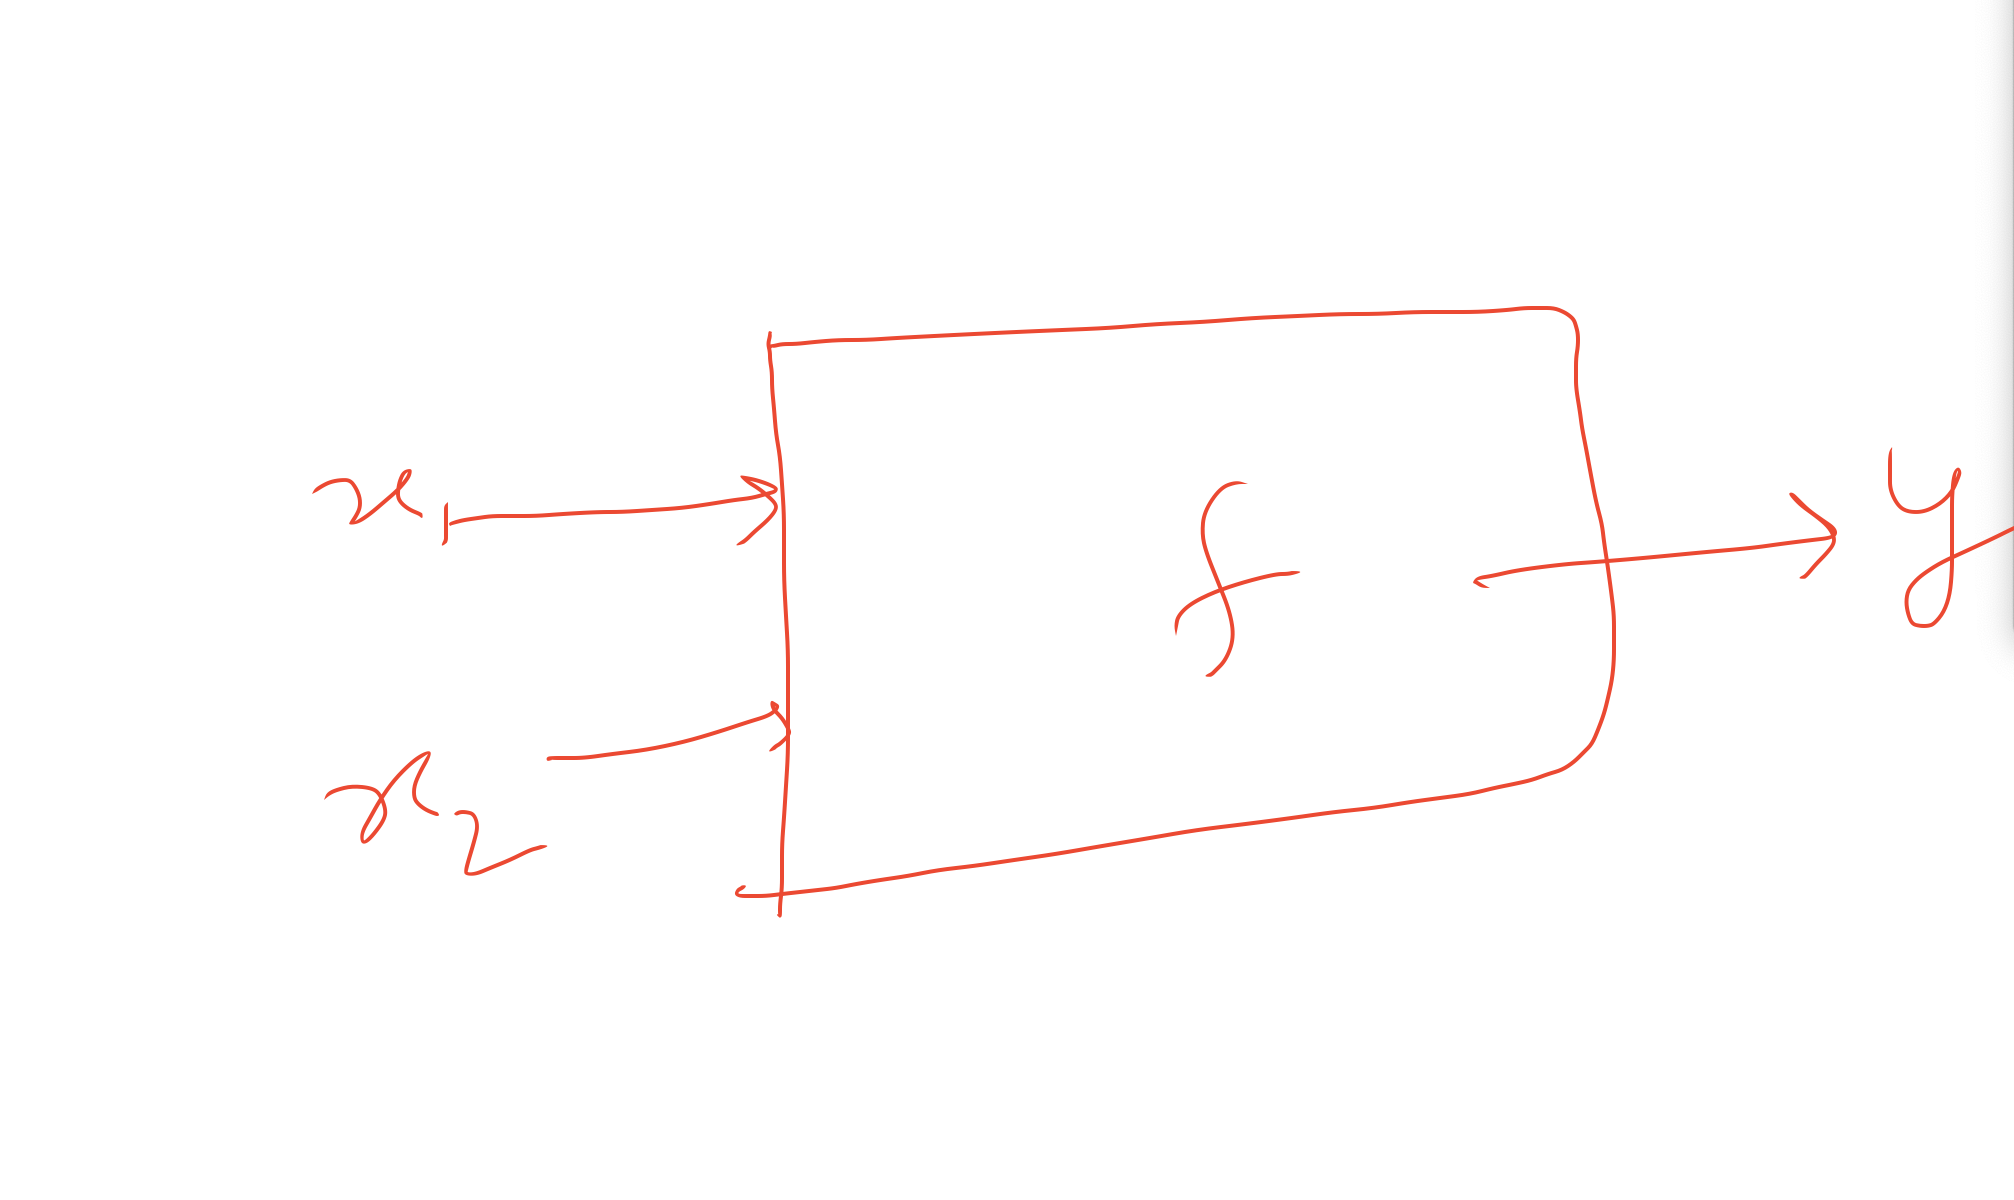

In [37]:
X1 = []
X2 = []
for x1, x2 in X:
    X1.append(x1)
    X2.append(x2)

In [38]:
X1 = list(map(lambda x: x[0], X))
X2 = list(map(lambda x: x[1], X))


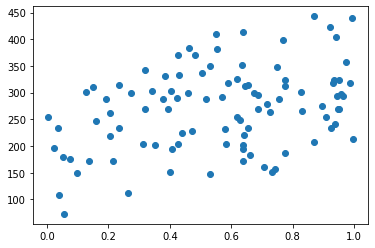

In [39]:
plt.scatter(X1, Y)

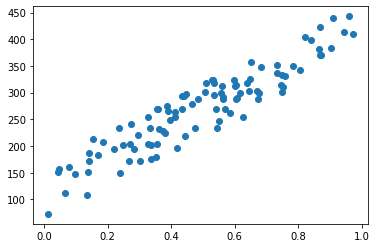

In [40]:
plt.scatter(X2, Y)

In [41]:
def sqloss2(weights):
    w0, w1, w2  = weights
    totalsqerror = 0
    for i, (x1, x2) in enumerate(X):
        predictedy = w0 + x1*w1 + x2*w2
        actualy = Y[i]
        error = actualy - predictedy
        totalsqerror += error * error
    return totalsqerror

In [42]:
def sqloss3(weights):
    w0, w1, w2, w3  = weights
    totalsqerror = 0
    for i, (x1, x2, x3) in enumerate(X):
        predictedy = w0 + x1*w1 + x2*w2 + w3*x3
        actualy = Y[i]
        error = actualy - predictedy
        totalsqerror += error * error
    return totalsqerror

In [44]:
def sqloss(weights, X, Y):
#     w0, w1, w2, w3  = weights
    totalsqerror = 0
    for i, x in enumerate(X):
        #predictedy = w[0] + x[0]*w[1] + x[1]*w[2] + x[2]*w[3]
        predictedy = weights[0]
        for j, col in enumerate(x):
            predictedy +=  x[j]*weights[j+1]
        actualy = Y[i]
        error = actualy - predictedy
        totalsqerror += error * error
    return totalsqerror

In [45]:
X[0]

(0.31833558277817975, 0.5691269510894333)

In [46]:
sqloss([1, 2, 3], X, Y)

7608611.009928452

In [47]:
sqloss([1.001, 2, 3], X, Y)

7608558.2179576615

In [48]:
sqloss([10, 2, 3], X, Y)

7141501.381837836

In [49]:
sqloss([1, 2.001, 3], X, Y)

7608579.928753238

In [50]:
sqloss([1, 2, 3.001], X, Y)

7608581.760277498

In [51]:
sqloss([10, 20, 30], X, Y)

5894372.762828708

In [52]:
sqloss([10.0001, 20, 30], X, Y)

5894368.123799695

In [53]:
sqloss([10, 20.0001, 30], X, Y)

5894370.04106647

In [54]:
def diffp(sqloss, weights, X, Y, idx):
    delta = 0.00000001
    weights = weights.copy()
    prevLoss = sqloss(weights, X, Y)
    weights[idx] += delta
    newLoss = sqloss(weights, X, Y)
    difference_loss = (newLoss - prevLoss)
    return difference_loss / delta

In [55]:
diffp(sqloss, [1,2,3], X, Y, 0)

-52792.0201420784

In [56]:
diffp(sqloss, [1,2,3], X, Y, 1)

-31081.30767941475

In [57]:
diffp(sqloss, [1,2,3], X, Y, 2)

-29249.30304288864

In [61]:
# m = random.random()
# c = random.random()
weights = []
for i in range(len(X[0]) + 1):
    weights.append(random.random())
    

In [62]:
weights

[0.3134873095371873, 0.11255986853945898, 0.1978391890243415]

In [63]:
len(X), len(Y)

(99, 99)

In [67]:
eta = 0.001
for epoch in range(1000):
#      weights = [m, c]
    print(epoch, "Current Loss: ", sqloss(weights, X,Y), weights)
    
#      de_dm = diff(sqloss, weights, 0)
#     de_dc = diff(sqloss, weights, 1)
    de = []
    for i in range(len(weights)):
        de.append(diffp(sqloss, weights, X, Y, i))

#     m1 = m - eta * de_dm
#     c1 = c - eta * de_dc
#     m, c = m1, c1
    for i in range(len(de)):
        weights[i] -= eta * de[i]
    

0 Current Loss:  42268.90428911234 [117.75362049047212, 86.38646475836147, 216.00400731473385]
1 Current Loss:  41553.21606825623 [117.36626014862517, 86.39199812412706, 216.75819888401932]
2 Current Loss:  40850.18675214013 [116.98163920481997, 86.39898013305363, 217.50531603971652]
3 Current Loss:  40159.582728086214 [116.59974892790737, 86.40738604688529, 218.2454315414016]
4 Current Loss:  39481.170929937 [116.22057403837638, 86.41718530660008, 218.9786196038422]
5 Current Loss:  38814.72758874178 [115.84409052556688, 86.42833934962262, 219.7049428002738]
6 Current Loss:  38160.030729323225 [115.4702903859255, 86.44082489288856, 220.42447461786836]
7 Current Loss:  37516.86338286724 [115.09914451562176, 86.4546041014183, 221.13727617466978]
8 Current Loss:  36885.013196403546 [114.73064782148535, 86.46965587493476, 221.84341950265846]
9 Current Loss:  36264.27296491051 [114.36477774804766, 86.48594237845835, 222.54296571987837]
10 Current Loss:  35654.43388786832 [114.0015190157977

240 Current Loss:  1150.2435972957114 [74.1871830923595, 96.51296730615293, 289.8353952002817]
241 Current Loss:  1137.5352599351147 [74.12451661093323, 96.54209792122863, 289.92475105384256]
242 Current Loss:  1125.0324900824064 [74.06234164318116, 96.57104813803024, 290.01335061708414]
243 Current Loss:  1112.7319112868552 [74.00065414185187, 96.59981863867877, 290.10120068847937]
244 Current Loss:  1100.6302882460493 [73.9394507872897, 96.62841008255789, 290.1883075208043]
245 Current Loss:  1088.7243264078463 [73.8787274867685, 96.65682360653598, 290.2746778897945]
246 Current Loss:  1077.0108777900825 [73.8184803521984, 96.68505921061303, 290.3603179345391]
247 Current Loss:  1065.486827943898 [73.7587061093985, 96.7131180543948, 290.44523397602643]
248 Current Loss:  1054.1490785157243 [73.69940134776365, 96.74100079726493, 290.5294327445172]
249 Current Loss:  1042.9945970209844 [73.64056192909297, 96.76870825776867, 290.61292015172694]
250 Current Loss:  1032.0204218751126 [73.

487 Current Loss:  376.5196263285816 [67.37640260166367, 99.9910386297234, 299.1859581254739]
488 Current Loss:  376.2886238474256 [67.36766316475618, 99.99597109233953, 299.1974136546214]
489 Current Loss:  376.06133181462104 [67.35899371346599, 100.00086554376146, 299.20877565929186]
490 Current Loss:  375.83768784049226 [67.35039356567208, 100.00572245578958, 299.22004498076785]
491 Current Loss:  375.61763692506463 [67.3418624712634, 100.01054184547691, 299.2312224034886]
492 Current Loss:  375.40111930649465 [67.33339953211393, 100.01532422441421, 299.24230850157255]
493 Current Loss:  375.18807803092744 [67.32500442990053, 100.0200698768186, 299.2533042129362]
494 Current Loss:  374.97846014732517 [67.31667652797691, 100.02477881405873, 299.26421005485463]
495 Current Loss:  374.7722057726123 [67.30841540570177, 100.02945162730619, 299.27502716988056]
496 Current Loss:  374.56926541355796 [67.30022039232276, 100.03408831656095, 299.28575587633713]
497 Current Loss:  374.369584135

748 Current Loss:  362.3441856346204 [66.42016115119654, 100.54110266813048, 300.42738722046306]
749 Current Loss:  362.34080570624405 [66.41909621816589, 100.54172907123764, 300.4287535770909]
750 Current Loss:  362.3374795720077 [66.41803974343597, 100.5423507790784, 300.43010900841364]
751 Current Loss:  362.3342073761506 [66.41699201690821, 100.54296721753424, 300.4314534121131]
752 Current Loss:  362.33098752151335 [66.41595261225697, 100.54357888682723, 300.4327869359822]
753 Current Loss:  362.32781918797866 [66.41492143853279, 100.54418572442962, 300.4341096823391]
754 Current Loss:  362.3247018023387 [66.41389875721538, 100.5447878099222, 300.43542178192365]
755 Current Loss:  362.32163445515084 [66.41288425566594, 100.54538500688075, 300.4367232802106]
756 Current Loss:  362.3186162530081 [66.4118777860916, 100.5459773323583, 300.43801427951803]
757 Current Loss:  362.3156465228737 [66.41087969523718, 100.54656504215025, 300.439294995851]
758 Current Loss:  362.3127245952454 

977 Current Loss:  362.1388052094748 [66.30865846500123, 100.60695834957194, 300.57016079582536]
978 Current Loss:  362.13872213089 [66.30849127713768, 100.6070576152343, 300.57037440202475]
979 Current Loss:  362.1386404201788 [66.30832544214749, 100.60715591455853, 300.57058620628777]
980 Current Loss:  362.13856001637805 [66.30816082929081, 100.60725338396885, 300.57079625408915]
981 Current Loss:  362.1384808924619 [66.30799763183526, 100.60735014852078, 300.57100469322177]
982 Current Loss:  362.13840304004094 [66.30783582704348, 100.60744630484812, 300.5712114270518]
983 Current Loss:  362.13832647087537 [66.30767528417559, 100.60754168810497, 300.57141629641774]
984 Current Loss:  362.13825107069636 [66.30751613397146, 100.60763625850093, 300.5716199095441]
985 Current Loss:  362.1381768613333 [66.30735800694887, 100.60772999329863, 300.57182181168355]
986 Current Loss:  362.1381038488659 [66.30720125553702, 100.60782303460662, 300.5720221108386]
987 Current Loss:  362.138032006

In [ ]:
w0 = 66
w1 = 100
w2 = 300
y = 66.3 + 100.6x1 + 300.13x2

In [69]:
# TensorFlow and Sklearn

In [ ]:
#     y = 100*x1 + 300*x2 + 67 + 5*random.random() - 5*random.random()

In [ ]:
#Can I use this for polynomial?


In [70]:
X = []
Y = []
for _ in range(1, 100):
    x1 = random.random()
    x2 = random.random()
    y = 100*x1*x1 + 300*x2 + 67 + 5*random.random() - 5*random.random()
    X.append((x1, x2))
    Y.append(y)

In [73]:
new_X = []
for row in X:
    x1, x2 = row
    new_X.append((x1, x2, x1*x1, x2*x2, x1*x2))

In [75]:
new_X[0]

(0.07958085334949838,
 0.49967529192610893,
 0.006333112219834368,
 0.24967539736144218,
 0.03976458612913947)

In [90]:
# m = random.random()
# c = random.random()
weights = []
for i in range(len(new_X[0]) + 1):
    weights.append(random.random())
    

In [92]:
eta = 0.001
for epoch in range(1000):
#      weights = [m, c]
    print(epoch, "Current Loss: ", sqloss(weights, new_X,Y), weights)
    
#      de_dm = diff(sqloss, weights, 0)
#     de_dc = diff(sqloss, weights, 1)
    de = []
    for i in range(len(weights)):
        de.append(diffp(sqloss, weights, new_X, Y, i))

#     m1 = m - eta * de_dm
#     c1 = c - eta * de_dc
#     m, c = m1, c1
    for i in range(len(de)):
        weights[i] -= eta * de[i]
    

0 Current Loss:  5461.735338140033 [83.55658098544873, 18.38023082427695, 201.90172602523018, 67.08631946059438, 75.95972431826911, 36.61058446216226]
1 Current Loss:  5456.137669636386 [83.5495982489264, 18.359576563397567, 201.95173350001352, 67.11533470626716, 75.9229035162173, 36.58995639473029]
2 Current Loss:  5450.546322037028 [83.54262005987758, 18.338937309180764, 202.00171450850104, 67.14432957925862, 75.88609990361536, 36.56934233351672]
3 Current Loss:  5444.961279752791 [83.53564523595915, 18.31831251592972, 202.05166986923797, 67.17330462526559, 75.84931420805904, 36.54874418846044]
4 Current Loss:  5439.382505753832 [83.52867386812059, 18.297702001745492, 202.10159876367908, 67.20225975333858, 75.8125453381547, 36.528160413420444]
5 Current Loss:  5433.809996070511 [83.52170550161455, 18.27710512998179, 202.1515013737233, 67.23119369018502, 75.77579302105394, 36.50759100839674]
6 Current Loss:  5428.2436984049555 [83.51474059118837, 18.256521445891266, 202.20137806316853

130 Current Loss:  4784.276078475876 [82.67738901004842, 15.810340676125051, 208.18785281588572, 70.69318190735328, 71.31394598272553, 34.047597014998935]
131 Current Loss:  4779.438162713761 [82.67084274003346, 15.791447651735652, 208.23456737415182, 70.71967594276327, 71.27929059660917, 34.028774749297334]
132 Current Loss:  4774.6056489217535 [82.66429974419944, 15.772567087423667, 208.28125801270727, 70.7461516063803, 71.24465185424586, 34.00996621696573]
133 Current Loss:  4769.77857593075 [82.65776065919263, 15.753700256481679, 208.32792409490577, 70.77260853440646, 71.21002920993877, 33.99117114515571]
134 Current Loss:  4764.956895667874 [82.65122402982152, 15.734846158465515, 208.37456580264626, 70.7990469087407, 71.1754226636879, 33.97238944291781]
135 Current Loss:  4760.140591194361 [82.64469094747975, 15.716005066223588, 208.4211835906761, 70.82546718413039, 71.14083276119007, 33.9536205645552]
136 Current Loss:  4755.329665106181 [82.63816104836943, 15.697176434059074, 20

257 Current Loss:  4211.181655773109 [81.87123846319801, 13.512142697890667, 213.92939027717586, 73.91391719613137, 67.04033788136829, 31.75886396622696]
258 Current Loss:  4206.984014654302 [81.86508755052992, 13.494835377513809, 213.97310313912823, 73.93815859506401, 67.0076904776545, 31.74162749548737]
259 Current Loss:  4202.790999419562 [81.85894018489117, 13.477540608163835, 214.01679417320776, 73.96238380499096, 66.97505835345171, 31.724402757229434]
260 Current Loss:  4198.602689173027 [81.85279563868599, 13.460257480346044, 214.06046156042504, 73.98659127977123, 66.9424412359115, 31.70718947860474]
261 Current Loss:  4194.419053360985 [81.84665382096492, 13.442985903110966, 214.10410602837584, 74.01078183795005, 66.90983967073069, 31.689988205310108]
262 Current Loss:  4190.240074656201 [81.84051491362689, 13.42572633120595, 214.14772784990856, 74.03495602522423, 66.87725383980822, 31.6727987554466]
263 Current Loss:  4186.065770490483 [81.83437937141926, 13.408478764630999, 2

380 Current Loss:  3728.426201417882 [81.1367108514859, 11.471122718375554, 219.13840149207755, 76.77195704820303, 63.13825650122115, 29.72467320052852]
381 Current Loss:  3724.765958135391 [81.1309172338114, 11.45523589229866, 219.17939605626526, 76.79419983252853, 63.107454507732, 29.708821662846056]
382 Current Loss:  3721.109800075691 [81.12512634462101, 11.439360616804478, 219.22036897447907, 76.8164271554441, 63.07666715710755, 29.692980902675806]
383 Current Loss:  3717.4577204922707 [81.1193376382179, 11.423495345752016, 219.2613198829211, 76.83863801650557, 63.04589413102465, 29.677150738118833]
384 Current Loss:  3713.8096697523956 [81.1135517967231, 11.407642080029618, 219.30225010035866, 76.86083382542972, 63.01513561138225, 29.66133103275093]
385 Current Loss:  3710.1656861414685 [81.10776872918714, 11.39179936444576, 219.34315871729706, 76.88301376367133, 62.98439173460454, 29.645522150369978]
386 Current Loss:  3706.5257916539335 [81.1019886629837, 11.375967926596203, 21

498 Current Loss:  3323.4055533942615 [80.47194530327752, 9.67123825148461, 223.83110061381086, 79.29195158941991, 59.6028681507926, 27.925796999463962]
499 Current Loss:  3320.1947799067607 [80.46647119109176, 9.656613576680101, 223.86964886462448, 79.31242963570082, 59.57374817680491, 27.91115031488767]
500 Current Loss:  3316.987545149227 [80.46099985286483, 9.641999633913073, 223.908177561302, 79.332893903137, 59.54464239093457, 27.896513180005748]
501 Current Loss:  3313.7838814454353 [80.45553078837466, 9.627395513688825, 223.94668570339928, 79.35334311843587, 59.51555020201002, 27.881885867666604]
502 Current Loss:  3310.583763145883 [80.45006436141912, 9.61280144338103, 223.9851735637647, 79.37377810014266, 59.486471746455464, 27.867268059547094]
503 Current Loss:  3307.387182265343 [80.4446007993719, 9.598218150585453, 224.02364173356983, 79.39419930300471, 59.45740756996773, 27.85265971017248]
504 Current Loss:  3304.194155162225 [80.43914005675825, 9.58364508960527, 224.0620

609 Current Loss:  2987.858823166752 [79.88003337296314, 8.109363227503636, 227.98974744799563, 81.47963363773567, 56.45404956394148, 26.35771521984021]
610 Current Loss:  2985.0192816900767 [79.87484238647804, 8.09584331591337, 228.0261318290148, 81.49857936734304, 56.42643575865466, 26.344102448840893]
611 Current Loss:  2982.1828654523756 [79.86965312803287, 8.082332544744858, 228.06249738349362, 81.5175112271562, 56.39883486819261, 26.33049854541492]
612 Current Loss:  2979.3495932720207 [79.86446650712233, 8.06883145969492, 228.09884352026057, 81.53642999024567, 56.371247028979525, 26.316903418612817]
613 Current Loss:  2976.5194525118777 [79.85928284206958, 8.05533974244041, 228.1351712397598, 81.5553352473388, 56.34367292313644, 26.303317250333528]
614 Current Loss:  2973.692417273389 [79.8541013598041, 8.041857392981328, 228.17147976892085, 81.57422731675877, 56.316111186421296, 26.28973976772864]
615 Current Loss:  2970.8685303291572 [79.84892210580065, 8.028384593216614, 228.

723 Current Loss:  2683.5301976298624 [79.30379894852004, 6.628404628372081, 232.01807383228225, 83.55597475348884, 53.38990520667383, 24.8615573726263]
724 Current Loss:  2681.0263855842954 [79.29888126519282, 6.615939821585343, 232.05236501124529, 83.57346301783662, 53.363762827390275, 24.84891612386742]
725 Current Loss:  2678.5253373162814 [79.29396535538027, 6.603483882371947, 232.08663845506163, 83.59093891305645, 53.33763349935569, 24.836282833187177]
726 Current Loss:  2676.0270520020395 [79.28905131003185, 6.591036901681363, 232.12089411825656, 83.6084023936736, 53.31151708614587, 24.823657591535046]
727 Current Loss:  2673.5315091578013 [79.2841398112686, 6.578598834038857, 232.15513163703218, 83.62585377801122, 53.28541258731664, 24.81104026248682]
728 Current Loss:  2671.038722082064 [79.2792304498179, 6.566169270171812, 232.1893508749643, 83.64329283869563, 53.25932036666589, 24.79843120984038]
729 Current Loss:  2668.548657788251 [79.27432349852816, 6.55374848292864, 232.

835 Current Loss:  2419.5611825764186 [78.76709034527076, 5.286500493183993, 235.75013595544516, 85.44020462215383, 50.53893808562523, 23.494909297208103]
836 Current Loss:  2417.3477663542135 [78.76242422817805, 5.2749997962558695, 235.78249072923865, 85.45636843484215, 50.51417113517917, 23.483141800009214]
837 Current Loss:  2415.1367720902253 [78.75776038482209, 5.263507375729532, 235.81482876832962, 85.47252096979616, 50.48941600816423, 23.47138148781847]
838 Current Loss:  2412.9281939019043 [78.75309899710183, 5.252023913726006, 235.84715016366755, 85.48866222701588, 50.46467229530779, 23.459628406110603]
839 Current Loss:  2410.722057531938 [78.74843956479518, 5.240548182427446, 235.87945455145456, 85.50479207007709, 50.43994113347824, 23.447882736784557]
840 Current Loss:  2408.5183349361287 [78.74378249717475, 5.229081318702228, 235.91174261381167, 85.52091095372714, 50.415221795079816, 23.43614502553715]
841 Current Loss:  2406.3170382242515 [78.7391273394932, 5.217622367580

967 Current Loss:  2147.4250008121517 [78.16965769116715, 3.838232089491939, 239.87924854080558, 87.47840830585017, 47.371168494097475, 22.0040150141565]
968 Current Loss:  2145.5100423419412 [78.1652705615742, 3.827782586540124, 239.90946531992887, 87.4931372087475, 47.347935633839626, 21.99318493314673]
969 Current Loss:  2143.5971762093864 [78.16088534192014, 3.817340177646983, 239.93966600099594, 87.50785574340523, 47.32471359656873, 21.982361445973545]
970 Current Loss:  2141.686424231619 [78.1565019867302, 3.806905499458807, 239.9698505840068, 87.52256350055075, 47.30150288250687, 21.971544507162214]
971 Current Loss:  2139.7777549376115 [78.15212090527703, 3.796478279127186, 240.00001997845612, 87.5372609349314, 47.27830353712878, 21.96073452598535]
972 Current Loss:  2137.8711819286295 [78.14774200661114, 3.7860587895005295, 240.0301735022229, 87.55194813749665, 47.25511528758605, 21.949931502442958]
973 Current Loss:  2135.966692443276 [78.143365381682, 3.775646894154633, 240.

In [ ]:
y = 67    + 0*x1    + 300*x2     + 100*x1*x1 + 0*x2*x2 + 0*x1*x2

In [ ]:
y = 68.88 - 8*x1 + 296.74* x2 + 106.88*x1*x1 + 2.57*x2*x2 + 2.62*x1*x2